In [1]:
!pip install multidict

     |████████████████████████████████| 160 kB 9.3 MB/s 


In [2]:
!pip install -U yellowbrick

In [3]:
!pip install mpld3

     |████████████████████████████████| 201 kB 8.9 MB/s 


# Ne pas oublier de relancer l'environnement

In [ ]:
from google.colab import files

# Si le dossier est déjà monté dans l'environnement d'exécution, on passe
try:
  !git clone https://github.com/Patent2net/DistorsionCom.git
  os.chdir('DistorsionCom')
except:
  print("Dossier déjà monté, vous pouvez continuer l'exécution")


Cloning into 'DistorsionCom'...
remote: Enumerating objects: 257, done.
remote: Total 257 (delta 0), reused 0 (delta 0), pack-reused 257
Receiving objects: 100% (257/257), 41.76 MiB | 13.35 MiB/s, done.
Resolving deltas: 100% (92/92), done.
Checking out files: 100% (101/101), done.
Dossier déjà monté, vous pouvez continuer l'exécution


In [ ]:
stockageEntree = "/content/DistorsionCom/OUT"
stockageSortie = "/content/DistorsionCom/OUT" # ce notebook ne sauvegarde que peu de choses. par ex. plt.savefig(stockageSortie + "/legendeTypSites2.png")


---
Personnalisation

NE PAS EXECUTER.

> sauf à vouloir personnaliser et travailler sur d'autres données



> Ces cellules permettent de réaliser les traitements à partir de son propre espace de stockage. A n'exécuter que dans ce cas en adaptant les dossiers d'entrée et sortie.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Récupérer les sorties sur son drive (créer un dossier "OUT")
stockageSortie = "/content/drive/MyDrive/OUT"

In [ ]:
# Récupérer les entrées sur son drive
stockageEntree = "/content/drive/MyDrive/OUT"

---

In [ ]:
import multidict as multidict

In [ ]:
import pandas as pd
import os, pickle
import pprint as pp
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import numpy as np
import matplotlib_inline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.parse as parse
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
from os import path
import pickle
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from matplotlib.patches import Patch #NEW
from matplotlib import cm, colors
from urllib import parse as parse
import mpld3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpld3 import plugins
from sklearn.manifold import TSNE
import matplotlib
from mpld3 import utils

css = """
table
{
  border-collapse: collapse;
}
th
{
  color: #ffffff;
  background-color: #000000;
}
td
{
  background-color: #cccccc;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""


class ClickInfo(mpld3.plugins.PluginBase):
    """mpld3 Plugin for getting info on click
    Comes from:
        http://stackoverflow.com/a/28838652/814354
    """

    JAVASCRIPT = """
    mpld3.register_plugin("clickinfo", ClickInfo);
    ClickInfo.prototype = Object.create(mpld3.Plugin.prototype);
    ClickInfo.prototype.constructor = ClickInfo;
    ClickInfo.prototype.requiredProps = ["id", "urls"];
    function ClickInfo(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    ClickInfo.prototype.draw = function(){
        var obj = mpld3.get_element(this.props.id);
        urls = this.props.urls;
        obj.elements().on("mousedown",
                          function(d, i){
                            window.open(urls[i], '_blank')});
    }
    """
    def __init__(self, points, urls):
        self.points = points
        self.urls = urls
        if isinstance(points, matplotlib.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None
        self.dict_ = {"type": "clickinfo",
                      "id": mpld3.utils.get_id(points, suffix),
                      "urls": urls}

In [ ]:
#%matplotlib inline

In [ ]:
os.chdir("DistorsionCom")

In [ ]:
from outils import makeImage, clean, Palette, NettoieLabels 

# Chargement des données de référence

## Stats

In [ ]:
stats = dict()
for ndf in os.listdir(stockageEntree +"/ContenusSites/"):
  if not ndf.startswith('.'):
    fichierEntree = stockageEntree +'/ContenusSites/' +ndf
    with open(fichierEntree, 'rb') as  fictemp: #pour ouvrir les contenus 
      soup = pickle.load(fictemp)

    data = [len(soup[url]) for url in soup.keys()]
    donnees = pd.DataFrame.from_dict(data)
    stats[ndf.replace('.pkl', '')] = donnees.describe()

 # stats contient la description statistique des données fondée sur la taille
 # de celle-ci. Cette variable servira a exclure les url dont la variation
 # à la moyenne est trop importante : trop ou pas assez sont considérés comme
 # des singularités. Cela peut provenir de la forme choisie pour la page (grande
 # page qui contient "tout" avec un ascenceur interminable ou page composée
 # par des appels url en js que le collecteur ne reconstruit pas) 

## Sites de référence

### Toutes les données

In [ ]:
fichierEntree = stockageEntree +'/ContenusTraites/' +"verbesSites.pkl"
with open (fichierEntree, 'rb') as  fictemp: #on récupère tous les contenus dans pickle
  Refverbes = pickle.load(fictemp)

fichierEntree = stockageEntree +'/ContenusTraites/' +'nomsSites.pkl'
with open (fichierEntree, 'rb') as  fictemp: #on récupère tous les contenus dans pickle
  Refnoms = pickle.load(fictemp)

fichierEntree = stockageEntree +'/ContenusTraites/' +'adjectifsSites.pkl'
with open (fichierEntree, 'rb') as  fictemp: #on récupère tous les contenus dans pickle
  Refadjectifs = pickle.load( fictemp)

fichierEntree = stockageEntree +'/ContenusTraites/' +'spacySites.pkl'
with open (fichierEntree, 'rb') as  fictemp: #on récupère tous les contenus dans pickle
  RefdicoEtiquettage = pickle.load(fictemp)

In [ ]:
RefdicoEtiquettage['locations']['ADV']

### Communs et 𝚫

> Sauvegardé par le traitement initial (déjà calculés, inutile de recommencer)



In [ ]:
fichierDeSortie = stockageEntree +'/ContenusTraites/' +'communs.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  communs = pickle.load(fictemp)

fichierDeSortie = stockageEntree +'/ContenusTraites/' +'communsExclusifs.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  communsExclusifs = pickle.load(fictemp)

fichierDeSortie = stockageEntree +'/ContenusTraites/' +'diff.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  diff = pickle.load(fictemp)


### Reconstruction et pondération centroïdes de référence




⚠ : deux voies via les deux cellules ci-dessous. Soit la représentation des centroides se fait sur tous les termes (communs ou pas aux autres types de sites), soit (2e cellule) les centroïdes sont calculés sur les termes exclusifs à un type de site. En cas d'erreurs la cellule précédente réinitialise les représentations.

#### Variante 1 : Tous les mots (communs ou pas)

In [ ]:
# à exécuter pour travailler avec tous les mots des sites parmi les catégories grammaticales retenues
centroid = dict()
for dico in [communs, communsExclusifs, diff]:
  for cle in dico .keys():
    if cle not in centroid .keys():
      centroid [cle] = dict()
    for cat in dico [cle].keys():
      if cat not in centroid [cle] .keys():
        centroid [cle][cat] = []
      for mot in dico [cle][cat]:
        centroid [cle][cat] .append(mot)

#### Variante 2 que les mots exclusifs à chaque site

In [ ]:
# ne pas exécuter la cellule précédente pour ne laisser intervenir que le delta
centroid = dict()
for dico in [diff]: # pondération du spécifique 
  for cle in dico .keys():
    if cle not in centroid .keys():
      centroid [cle] = dict()
    for cat in dico [cle].keys():
      if cat not in centroid [cle] .keys():
        centroid [cle][cat] = []
      for mot in dico [cle][cat]:
        centroid [cle][cat] .append(mot)
        #centroid [cle][cat] .append(mot)

#### Suppression des distinctions des catégories grammaticales 
> On n'utilise plus que celles retenues pour représenter les sites.

Adapter le code ci-dessous ou produire une variante à partir d'ici pour pouvoir jongler avec l'utilisation des différentes catégories grammaticales. Par la suite les catégories retenues sont celles positionnées dans la représentation des centroides des partenaires.

In [ ]:
# applatissement des représentations des termes retenus en une grande liste
vectCentroid = dict()
for cle in centroid:
  vectCentroid [cle]= []
  for cat in centroid [cle] .keys():
    vectCentroid [cle] .extend([ mot for mot in centroid [cle][cat] ])

## Backlinks

### Chargement des données

> Même format mais dans un dossier à part.
Note: pour la lisibilité pourrait être dans "backlinksTraites" plutôt que dans ContenusTraites2...

In [ ]:
fichierEntree = stockageEntree +'/backlinksTraites/' +"verbesSites.pkl"
with open (fichierEntree, 'rb') as  fictemp: #on récupère tous les contenus dans pickle
  verbes = pickle.load(fictemp)

fichierEntree = stockageEntree +'/backlinksTraites/' +'nomsSites.pkl'
with open (fichierEntree, 'rb') as  fictemp: #on récupère tous les contenus dans pickle
  noms = pickle.load(fictemp)

fichierEntree = stockageEntree +'/backlinksTraites/' +'adjectifsSites.pkl'
with open (fichierEntree, 'rb') as  fictemp: #on récupère tous les contenus dans pickle
  adjectifs = pickle.load( fictemp)

fichierEntree = stockageEntree +'/backlinksTraites/' +'spacySites.pkl'
with open (fichierEntree, 'rb') as  fictemp: #on récupère tous les contenus dans pickle
  dicoEtiquettage = pickle.load(fictemp)

In [ ]:
# Sauvegarde en json des backlinks inutile d'exécuter
import json
with open(stockageSortie + '/JSON/BacklinksContenusSites.json', 'w', encoding='utf-8') as f:
    json.dump(dicoEtiquettage, f, ensure_ascii=False, indent=4)

with open(stockageSortie + '/JSON/Backlinksverbes.json', 'w', encoding='utf-8') as f:
    json.dump(verbes, f, ensure_ascii=False, indent=4)
with open(stockageSortie + '/JSON/Backlinksnoms.json', 'w', encoding='utf-8') as f:
    json.dump(noms, f, ensure_ascii=False, indent=4)
with open(stockageSortie + '/JSON/Backlinksadjectifs.json', 'w', encoding='utf-8') as f:
    json.dump(adjectifs, f, ensure_ascii=False, indent=4)


In [ ]:
# Sauvegarde en json inutile d'exécuter
for fic in os.listdir(stockageEntree+"/ContenusTraites"):
  ficname = stockageEntree+"/ContenusTraites/"+fic
  with open(ficname, 'rb') as ficSrc:
    data = pickle.load(ficSrc)
    ficSortie = fic .replace(".pkl", ".json")
    try:  
      with open(stockageSortie + '/JSON/' + ficSortie, 'w', encoding='utf-8') as ficRes:
        json.dump(data, ficRes, ensure_ascii=False, indent=4)
    except:
      tempo = dict()
      for cat in data.keys():
        tempo [cat] = dict()
        for cle in data [cat]:
          tempo [cat][cle] = list (data [cat][cle])
      with open(stockageSortie + '/JSON/' + ficSortie, 'w', encoding='utf-8') as ficRes:
        json.dump(tempo, ficRes, ensure_ascii=False, indent=4)
      
      continue


## Mots communs et diff

In [ ]:
toutMotCommuns = [mot for cle in communs.keys() for cat in communs[cle].keys() for mot in communs[cle][cat]]

In [ ]:
print(len(toutMotCommuns)) # la diversité des lemmes communs à au moins deux sites

19828


In [ ]:
toutMotCommuns.extend([mot for cle in communsExclusifs.keys() for cat in communsExclusifs[cle].keys() for mot in communsExclusifs[cle][cat]])

In [ ]:
print(len(toutMotCommuns)) # la diversité des lemmes communs à tous les sites avec leurs occurrences

20741


#### Différences aux sites de référence (les parcs)

In [ ]:
catGram = communs['parcs'].keys()

In [ ]:
backlinkDiff = dict()
for cle in dicoEtiquettage.keys():
  backlinkDiff[cle] = dict()
  for cat in catGram:
    if cat in dicoEtiquettage[cle].keys():
      backlinkDiff[cle][cat] = [mot for mot in dicoEtiquettage[cle][cat] if mot not in toutMotCommuns and clean(mot)]
    else:
      backlinkDiff[cle][cat] = []

In [ ]:
temp = [url for url in dicoEtiquettage .keys() if "portcros" in url]
print (temp)

['http://www.portcrosparcnational.fr/', 'https://www.webwiki.fr/portcros-parcnational.fr', 'https://seodit.p3x.fr/analyse-www.portcros-parcnational.fr-140614', 'https://espritparcnationalportcros.com/', 'https://www.outdoorgo.com/portcros/', 'http://www.sailingbandol.fr/index.php?nocache=1&alias=portcros-location-voilier-bandol-var', 'http://concours-portcros.over-blog.com/links.html']


## Le PNPC

In [ ]:
# données du pnpc
dicoEtiquettage ['http://www.portcrosparcnational.fr/'] .keys()

dict_keys(['LOC', 'MISC', 'ORG', 'PER', 'ADJ', 'VERB', 'NOUN', 'ADV'])

In [ ]:
PNPCtoutMotHorsCommuns = [mot for cat in catGram for mot in dicoEtiquettage['http://www.portcrosparcnational.fr/'][cat] if mot not in toutMotCommuns and clean(mot)]

In [ ]:
dicoEtiquettage

In [ ]:
palette = Palette(catGram)

In [ ]:
coulMots = dict()
for cat in palette .keys():
  coulMots [colors.to_hex((palette[cat]))] = []
for cat in catGram:
  for mot in dicoEtiquettage['http://www.portcrosparcnational.fr/'][cat]:
    if mot in PNPCtoutMotHorsCommuns:
      [colors.to_hex((palette[cat]))].append(mot)
    

In [ ]:
motAExclure = "toggle >déc septem avr tél décembre mail suite nous".split()

In [ ]:
PNPCtoutMot = [mot for cat in catGram for mot in dicoEtiquettage['http://www.portcrosparcnational.fr/'][cat] if mot not in motAExclure and clean(mot)]
PNPCVerb = [mot for mot in dicoEtiquettage['http://www.portcrosparcnational.fr/']["VERB"] if mot not in motAExclure and clean(mot)]
PNPCNoun= [mot for mot in dicoEtiquettage['http://www.portcrosparcnational.fr/']["NOUN"] if mot not in motAExclure and clean(mot)]
PNPCAdj = [mot for mot in dicoEtiquettage['http://www.portcrosparcnational.fr/']["ADJ"] if mot not in motAExclure and clean(mot)]

In [ ]:
def makeImage(text):
    wc = WordCloud(background_color="white", max_words=100,width=800, height=400)
    wc.generate_from_frequencies(text)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

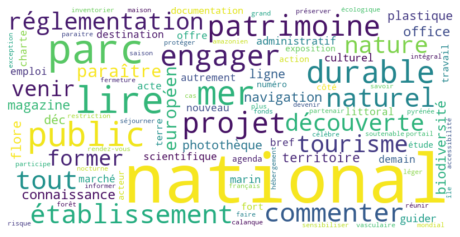

In [ ]:
makeImage(Counter(PNPCtoutMot))#, palette, coulMots

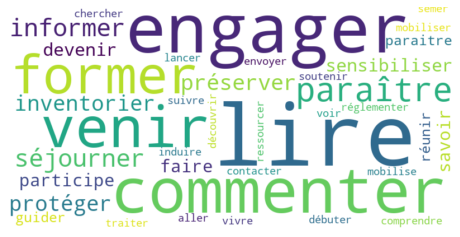

In [ ]:
makeImage(Counter(PNPCVerb))

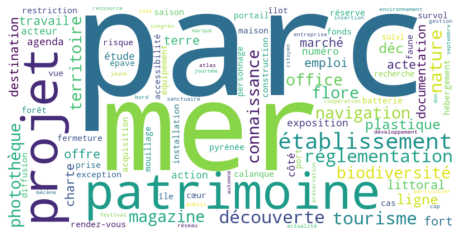

In [ ]:
makeImage(Counter(PNPCNoun))

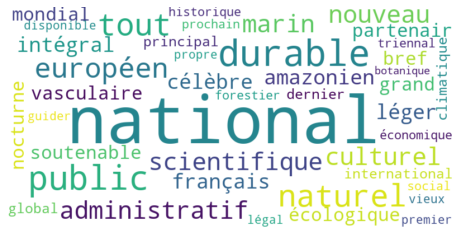

In [ ]:
makeImage(Counter(PNPCAdj))

Note : il est possible à ce stade d'identitifer les spécificités du PNPC en regard des autres parcs nationaux en construisant le delta avec la classe "parc". Les variables PNPC* et communs ['parc']

In [ ]:
PNPCbacklinkDiff = dict()
for cle in dicoEtiquettage.keys():
  PNPCbacklinkDiff[cle] = dict()
  for cat in communs['parcs'].keys():
    if cat in dicoEtiquettage[cle].keys():
      PNPCbacklinkDiff[cle][cat] = [mot for mot in dicoEtiquettage[cle][cat] if mot not in PNPCtoutMot and clean(mot)]
    else:
      PNPCbacklinkDiff[cle][cat] = []

In [ ]:
backlinkDiff # les lemmes par catégorie grammaticale exclusifs par site. 

In [ ]:
diff.keys()

# Traitements

  

In [ ]:
catGram = ['NOUN','VERB','ADJ'] # parmi ['LOC', 'MISC', 'PER', 'ORG', 'ADJ', 'NOUN', 'VERB']) 

## Préparation
> un site web va être représenté par un "vecteur" de mots : une chaine de caractères contenant les mots identifiés par les procédés d'extraction précédemment mis en oeuvre.

### Tous les termes


In [ ]:
vecteurs = dict()
for url in dicoEtiquettage.keys():
  if url not in vecteurs.keys():
    vecteurs[url] =  []
  catEnCours = [cat for cat in dicoEtiquettage[url].keys() if cat in catGram]
  for cat in catEnCours:
    vecteurs [url].extend(dicoEtiquettage[url][cat])


In [ ]:
for url in vecteurs.keys():
  vecteurs[url] = ' '.join([mot for mot in vecteurs[url] if clean(mot)])

In [ ]:
for typ in vectCentroid.keys():
  vectCentroid[typ] = ' '.join([mot for mot in vectCentroid[typ] if clean(mot)])

In [ ]:
vectCentroid["parcs"] # exemple et vérifications. Les mots retenus sont séparés par des espaces

'inviter informer nourrir réouvrir élire consituer engager aller étendre reconnaître apporte éclore télécharger envoyer évoque situer valoir sauvegarder tapir remonter inventorier éteindre encourager recrute ouvrir sensibiliser rapprocher interdire connaître appeler dessiner agir chanter lancer évaluer attribuer solliciter constitue proposer réussir protéger considérer assurer montre travailler préserver souhaiter réunir retrouver invite mettre adapter délecter prendre observer termine laisser bâtir aménager organise marche constituer consolider abrite reste donne couver vivre inspirer plonger habiter oceller certifier voici jouer condamner dynamiser changer estimer comprendre niquer battre charger niche obtenir classer comporter dormir constater fréquente encadrer passer figure mener cherche associer procéder donner paraître randonner lire conserver visiter contribuer brûler offrir dédier connaitre impacter être chercher lâcher concerner tenter hésiter préparer tenir utiliser promouvo

In [ ]:
toutVect = dict() # tout dans une matrice
# sites de référence
for url in vectCentroid.keys():
  toutVect[url] = vectCentroid[url]
# backlinks
for url in vecteurs .keys():
  toutVect[url] = vecteurs[url]

In [ ]:
vecteursDiff = dict()
for url in backlinkDiff.keys():
  if url not in vecteursDiff.keys():
    vecteursDiff[url] =  []
  catEnCours = [cat for cat in backlinkDiff [url].keys() if cat in catGram]
  for cat in catEnCours:
    vecteursDiff [url].extend(backlinkDiff[url][cat])


In [ ]:
for url in vecteursDiff.keys():
  vecteursDiff[url] = ' '.join([mot for mot in vecteursDiff[url] if clean(mot)])

In [ ]:
toutVect2 = dict() # tout dans une matrice
# sites de référence
for url in vectCentroid.keys():
  toutVect2[url] = vectCentroid[url]
# backlinks
for url in vecteursDiff .keys():
  toutVect2[url] = vecteursDiff[url] 

toutVect2 est un dictionnaire contient tous les sites de référence plus les sites backlinks. A chaque clé est associé l'ensemble des mots spécifiques à chaque site en regard des centroïdes de référence

toutVect est un dictionnaire contient tous les sites de référence plus les sites backlinks. A chaque clé est associé l'ensemble des mots.

### Les termes spécifiques

## Espace normé
> le traitement tdidf a fait ses preuves pour la comparaison des représentations de documents en normalisant la matrice des occurrences terminologiques

### Sur tous les termes

In [ ]:
tdidf = TfidfVectorizer()
dataNorm = tdidf.fit_transform(toutVect .values())
mots = tdidf.get_feature_names_out()
df = pd.DataFrame(dataNorm .todense(), columns = mots, index =(list(toutVect .keys())))


### Sur les termes spécifiques

In [ ]:
tdidf = TfidfVectorizer()
dataNorm2 = tdidf.fit_transform(toutVect2 .values()) # termes spécifiques
mots = tdidf.get_feature_names_out()
df2 = pd.DataFrame(dataNorm2 .todense(), columns = mots, index =(list(toutVect2 .keys())))

In [ ]:
df # les valeurs en ligne colonne sont les occurrences des mots relatives à leur réprésentation dans le corpus

### Matrice de similarité (cosinus de Salton)
> les lignes et les colonnes sont les sites. La valeur est la distance entre le site de la colonne i, et celui de la ligne j. La matrice est symétrique et la diagonale ne contient que des 1 (la similarité entre un site et lui même est maximale.

In [ ]:
similarity_matrix = cosine_similarity(dataNorm)
similarity_matrix2 = cosine_similarity(dataNorm2)

In [ ]:
df3 = pd.DataFrame(similarity_matrix, index = df .index)
df4 = pd.DataFrame(similarity_matrix2, index = df2 .index)

### Représentation (démonstration de la divergence des contenus de sites)

> Avec seuls les mots spécifique à chaque site pour réaliser les comparaisons de contenus de site, seuls quelques sites sont "ressemblants"

[Text(0, 0.5, 'oTourism'),
 Text(0, 1.5, 'Gouv'),
 Text(0, 2.5, 'parcs'),
 Text(0, 3.5, 'organisations'),
 Text(0, 4.5, 'Services'),
 Text(0, 5.5, 'Hebergement'),
 Text(0, 6.5, 'restauration'),
 Text(0, 7.5, 'locations'),
 Text(0, 8.5, 'mairies'),
 Text(0, 9.5, 'partnersSansTyp'),
 Text(0, 10.5, 'partnersAvecTyp'),
 Text(0, 11.5, 'casinohyeres'),
 Text(0, 12.5, 'ignrando'),
 Text(0, 13.5, 'kiddyparc'),
 Text(0, 14.5, 'artdanh'),
 Text(0, 15.5, 'balade-en-mer-83'),
 Text(0, 16.5, 'tlv-tvm'),
 Text(0, 17.5, 'aquavillageparc'),
 Text(0, 18.5, 'thalassa'),
 Text(0, 19.5, 'squashclub4'),
 Text(0, 20.5, 'kitecenter83'),
 Text(0, 21.5, 'aphroditespa'),
 Text(0, 22.5, 'spacoupole-hyeres'),
 Text(0, 23.5, 'toulon-hyeres.aeroport'),
 Text(0, 24.5, 'spinout'),
 Text(0, 25.5, 'amotos'),
 Text(0, 26.5, 'rosalieandco'),
 Text(0, 27.5, 'kraken-sports-nautiques'),
 Text(0, 28.5, 'fracpaca'),
 Text(0, 29.5, 'aquabulles-plongee'),
 Text(0, 30.5, 'reseaumistral'),
 Text(0, 31.5, 'lacledutemps'),
 Text(0,

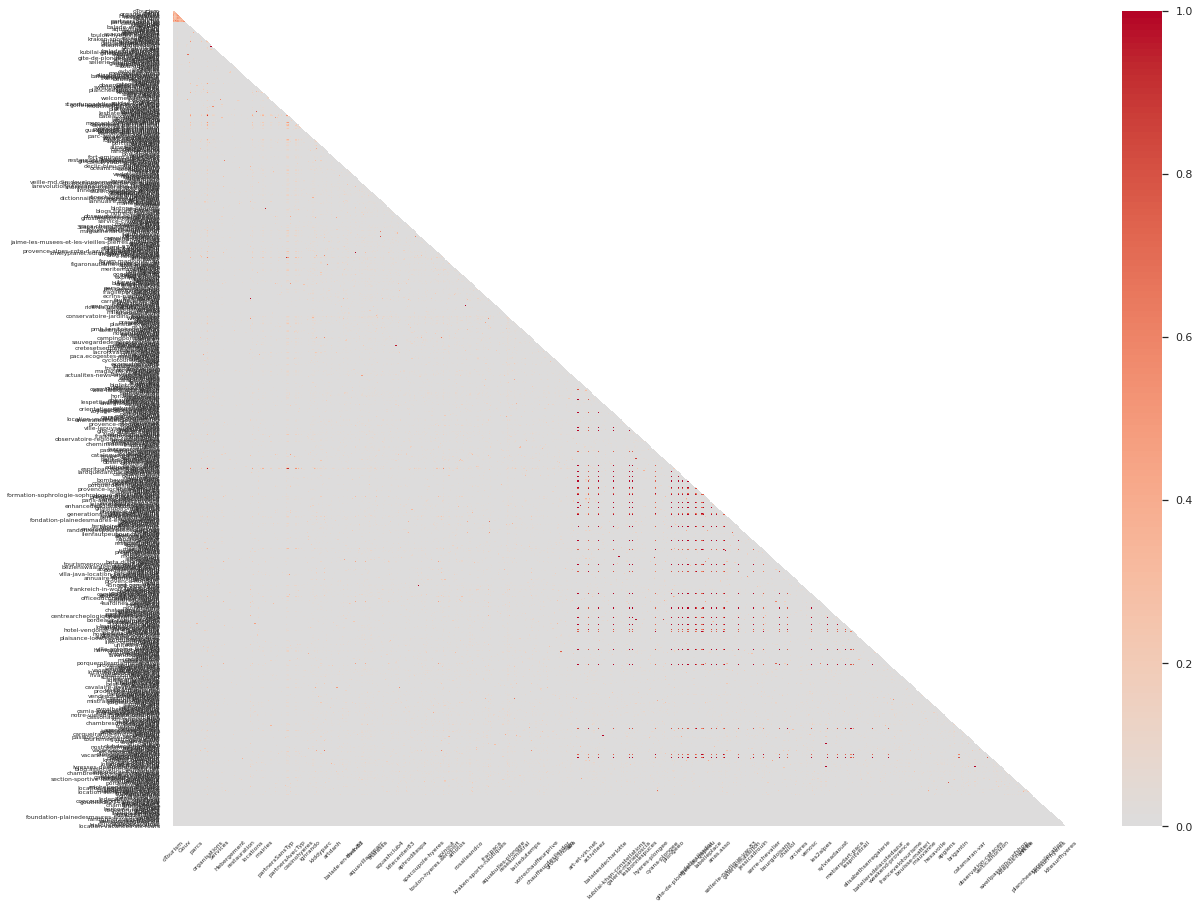

In [ ]:
sns.set_theme(style="white")
masque = np.triu(np.ones_like(similarity_matrix2, dtype=bool)) # pour cacher le triagle supérieur
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(200, 20, as_cmap=True) # gradient de couleur du plus éloigné (noir) au plus proche (rouge)
sns.set(rc={"figure.figsize":(25, 15)})
xticklabels = NettoieLabels(df4.index)
heatmap2 = sns.heatmap(df4, mask=masque, cmap="coolwarm", vmax=1, center=0,  yticklabels=xticklabels, cbar_kws={"shrink": 1} )
heatmap2.set_xticklabels(labels=xticklabels, rotation=45, fontsize=6)
heatmap2.set_yticklabels(labels=xticklabels, rotation=0, fontsize=6)

> en prenant tous les mots (toujours avec la distance de Salton similarity_matrix2), les points communs sont plus forts.


[Text(0, 0.5, 'oTourism'),
 Text(0, 1.5, 'Gouv'),
 Text(0, 2.5, 'parcs'),
 Text(0, 3.5, 'organisations'),
 Text(0, 4.5, 'Services'),
 Text(0, 5.5, 'Hebergement'),
 Text(0, 6.5, 'restauration'),
 Text(0, 7.5, 'locations'),
 Text(0, 8.5, 'mairies'),
 Text(0, 9.5, 'partnersSansTyp'),
 Text(0, 10.5, 'partnersAvecTyp'),
 Text(0, 11.5, 'http://casinohyeres.com'),
 Text(0, 12.5, 'http://ignrando.fr'),
 Text(0, 13.5, 'https://www.kiddyparc.com/'),
 Text(0, 14.5, 'http://artdanh.com'),
 Text(0, 15.5, 'http://balade-en-mer-83.fr'),
 Text(0, 16.5, 'http://tlv-tvm.com'),
 Text(0, 17.5, 'http://aquavillageparc.com'),
 Text(0, 18.5, 'http://thalassa.com'),
 Text(0, 19.5, 'http://squashclub4.fr'),
 Text(0, 20.5, 'http://kitecenter83.fr'),
 Text(0, 21.5, 'http://aphroditespa.fr'),
 Text(0, 22.5, 'http://spacoupole-hyeres.com'),
 Text(0, 23.5, 'http://toulon-hyeres.aeroport.fr'),
 Text(0, 24.5, 'http://spinout.fr'),
 Text(0, 25.5, 'http://amotos.fr'),
 Text(0, 26.5, 'http://rosalieandco.com'),
 Text(0,

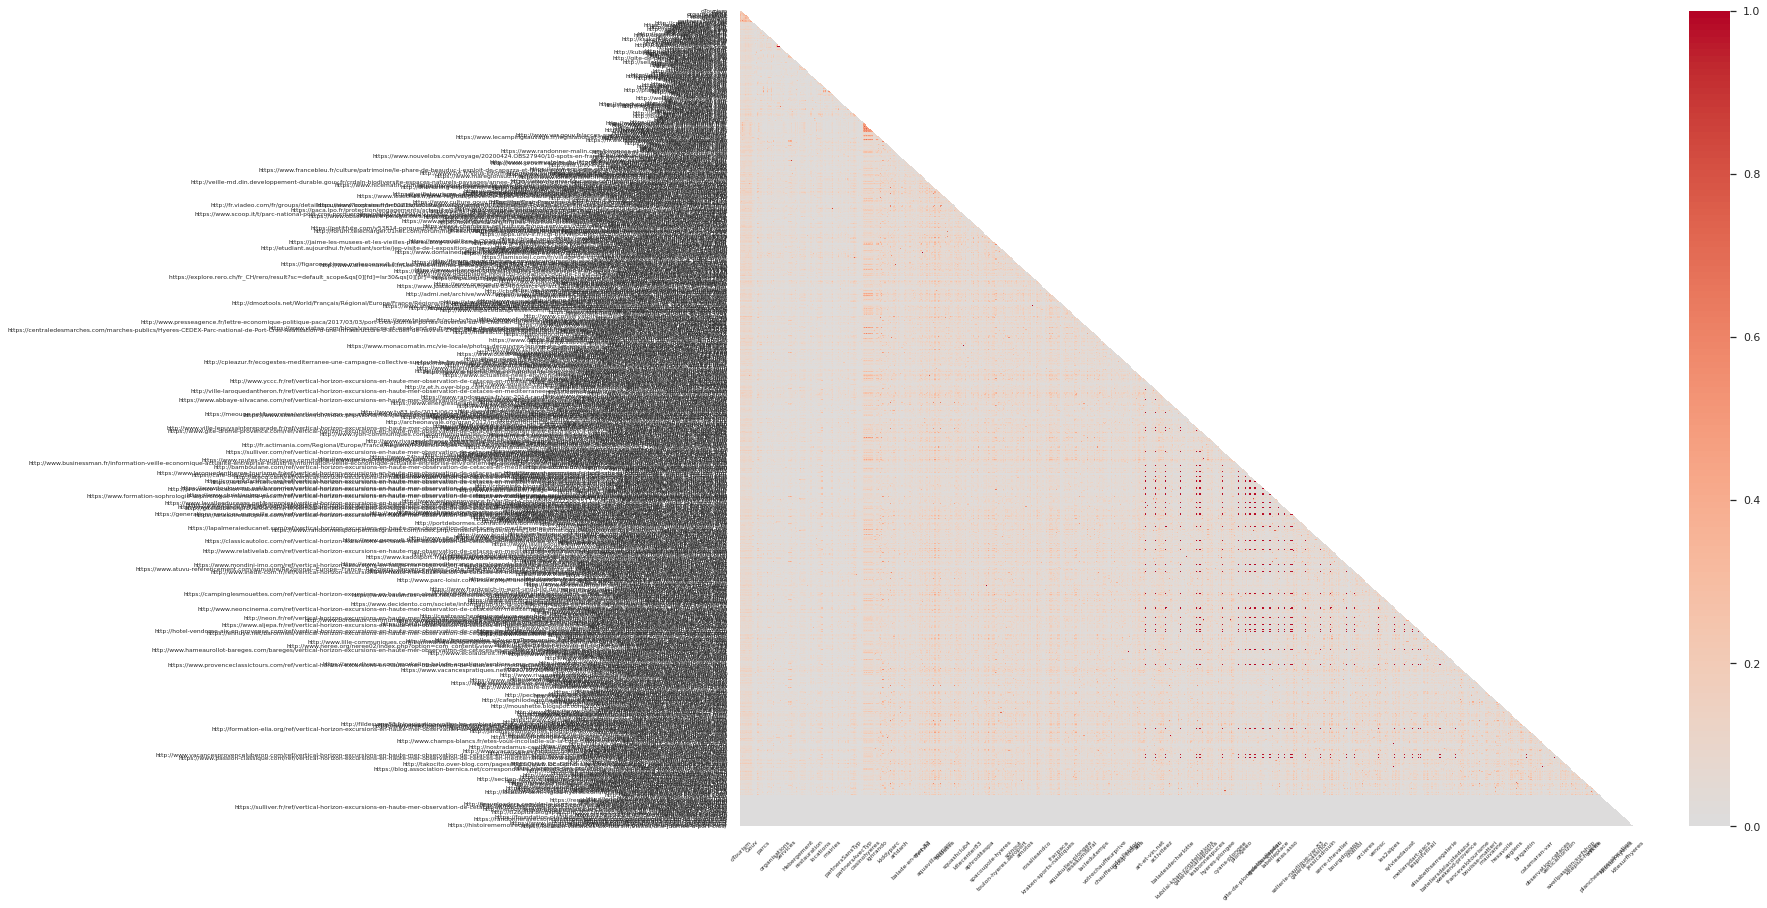

In [ ]:
sns.set_theme(style="white")
masque = np.triu(np.ones_like(similarity_matrix2, dtype=bool)) # pour cacher le triagle supérieur
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(200, 20, as_cmap=True) # gradient de couleur du plus éloigné (noir) au plus proche (rouge)
sns.set(rc={"figure.figsize":(25, 15)})
xticklabels = NettoieLabels(df3.index)
heatmap2 = sns.heatmap(df3, mask=masque, cmap="coolwarm", vmax=1, center=0,  yticklabels=xticklabels, cbar_kws={"shrink": 1} )
heatmap2.set_xticklabels(labels=xticklabels, rotation=45, fontsize=6)
heatmap2.set_yticklabels(labels=df3.index, rotation=0, fontsize=6)

# Regroupement par similarité



### Test de clusterisation
> kmeans fonctionne bien mais il faut lui donner le nombre de classes à identifier. La méthode [KELbow](https://www.reneshbedre.com/blog/kmeans-clustering-python.html) permet d'identifier le nombre optimal de classes

#### Méthode KELbow pour l'identification du nombre de classes

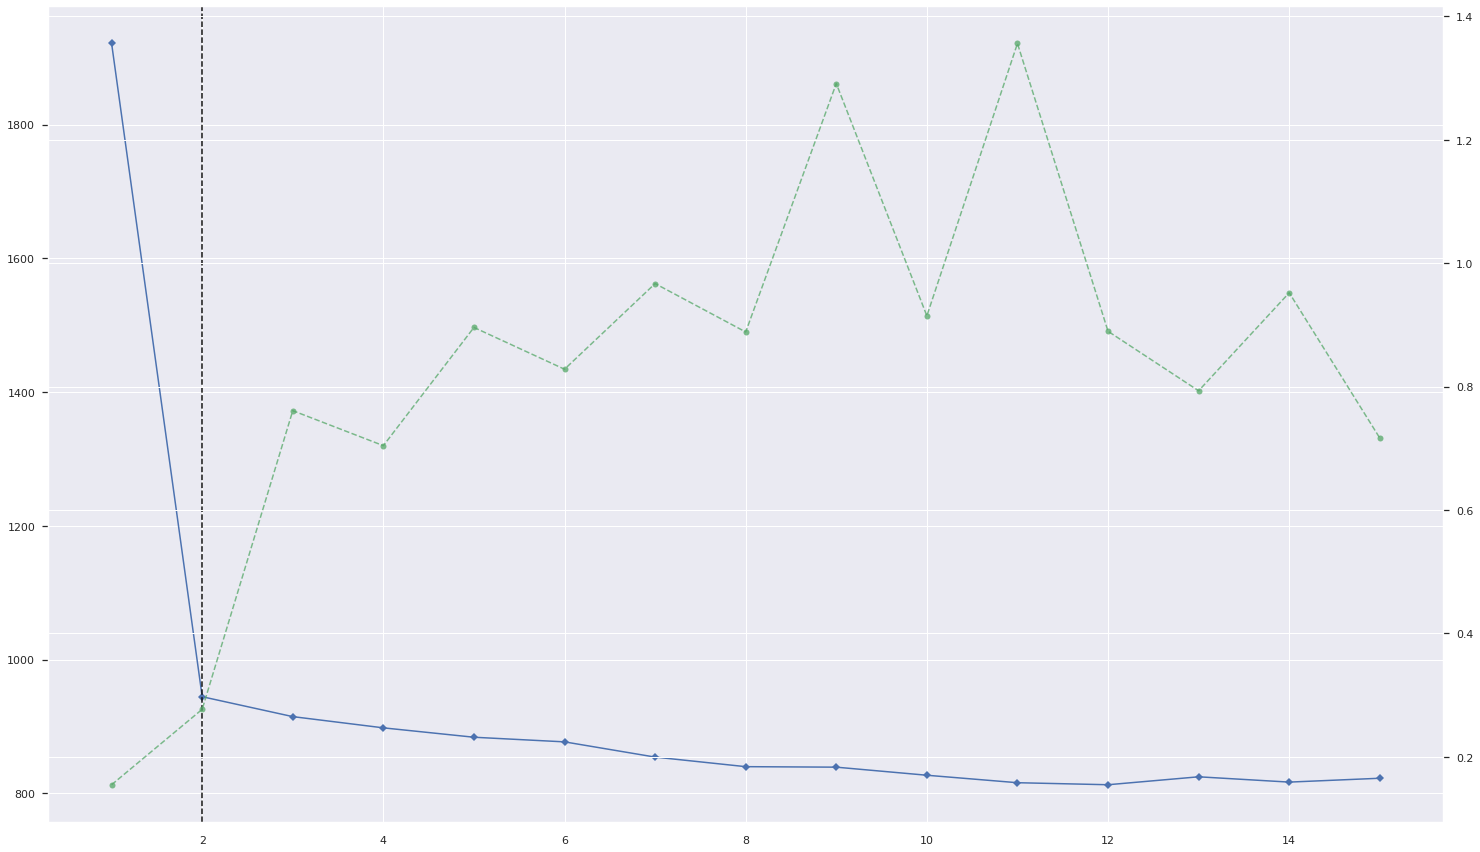

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,16)).fit(df4)

In [ ]:
visualizer.show()

In [ ]:

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df4)


In [ ]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
kmeans.inertia_

944.4133786828256

#### Les centres

In [ ]:
len(kmeans.cluster_centers_ [0])

785

In [ ]:
Counter(kmeans.labels_)


Counter({0: 749, 1: 36})

In [ ]:
set(kmeans.labels_) # les classes des centroides

{0, 1}

In [ ]:
centroid.keys()

dict_keys(['oTourism', 'Gouv', 'parcs', 'organisations', 'Services', 'Hebergement', 'restauration', 'locations', 'mairies', 'partnersSansTyp', 'partnersAvecTyp'])

In [ ]:
df4.loc[list(centroid.keys())][2] # l'index 2 correspond aux "parcs". Pour les valeurs, 1 c'est pareil, 0 c'est très loin de l'être
# les classes restauration et location sont les plus éloignées du parc. Les partenaires (grossièrement non typées sont nettement plus proches), la classe typée contient peu de sites

oTourism           0.338676
Gouv               0.275950
parcs              1.000000
organisations      0.389454
Services           0.322944
Hebergement        0.291605
restauration       0.239366
locations          0.276432
mairies            0.305922
partnersSansTyp    0.635610
partnersAvecTyp    0.376361
Name: 2, dtype: float64

#### Représentation (identification d'un groupe particulier)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
couleurs = Palette(set(kmeans.labels_))
couleurs = [colors.to_hex((couleurs[cle])) for cle in couleurs]
lstCoul=[couleurs [lab] for lab in kmeans.labels_]

fig, ax = plt.subplots(figsize=(20, 15))
model = TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
count = 0
Y = model.fit_transform(df4)
labels = NettoieLabels(df4.index)
points = ax.scatter (Y[:, 0], Y[:, 1], c=lstCoul)

tooltip = plugins.PointHTMLTooltip(points, labels, [couleurs [lab] for lab in kmeans.labels_],
                                   voffset=10, hoffset=10, css=css)
plugins.connect(fig, tooltip)
mpld3.display()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Explicitation des classes
> quel site est dans quelle classe et récupération des mots associés à la classe (non utilisé par la suite)

In [ ]:
motDeClasse = dict()
for ind, cat in enumerate(kmeans.labels_):
  url = df2.index [ind]
  if cat ==0: # changer ici pour voir apparaître les sites selon leur classe kmean
    print (url)
  if cat not in motDeClasse.keys():
    motDeClasse [cat]= ""
    motDeClasse [cat] += toutVect2 [url]
  else:
    motDeClasse [cat]+= toutVect2 [url]

oTourism
Gouv
parcs
organisations
Services
Hebergement
restauration
locations
mairies
partnersSansTyp
partnersAvecTyp
http://casinohyeres.com
http://ignrando.fr
https://www.kiddyparc.com/
http://artdanh.com
http://balade-en-mer-83.fr
http://tlv-tvm.com
http://aquavillageparc.com
http://thalassa.com
http://squashclub4.fr
http://kitecenter83.fr
http://aphroditespa.fr
http://spacoupole-hyeres.com
http://toulon-hyeres.aeroport.fr
http://spinout.fr
http://amotos.fr
http://rosalieandco.com
http://kraken-sports-nautiques.com
http://fracpaca.org
http://aquabulles-plongee.fr
http://reseaumistral.com
http://lacledutemps.fr
http://votrechauffeurprive.fr
http://chauffeurdesilesdor.com
http://group-indigo.com
http://ada.fr
http://art-et-vin.net
http://activiteez.com
http://baladesdecharlotte.fr
http://kubilai-khan-constellations.com
http://galerie-marieposcia.fr
http://lesbonnespuces.com
http://hyeres-plongee.com
http://cyana-plongee.com
http://plongeeo.com
http://gite-de-plongee-du-gapeau.com
http

# Reconstruction de l'espace lexical sans les sites "parasites"
 
> la classe en bleu sur la représentation précédente provient tous d'un même contenu. Une technique de référencement : la même page sur des sites (zone DNS) différents pour artificiellement monter en degré d'indexation.

Nous reconstruisons l'espace lexical sans ces sites.

In [ ]:
len([ind for ind,cat in enumerate(kmeans.labels_) if cat !=1])

749

In [ ]:
indices = [ind for ind,cat in enumerate(kmeans.labels_) if cat !=1]

In [ ]:
df5 = df4 .iloc [indices,indices]

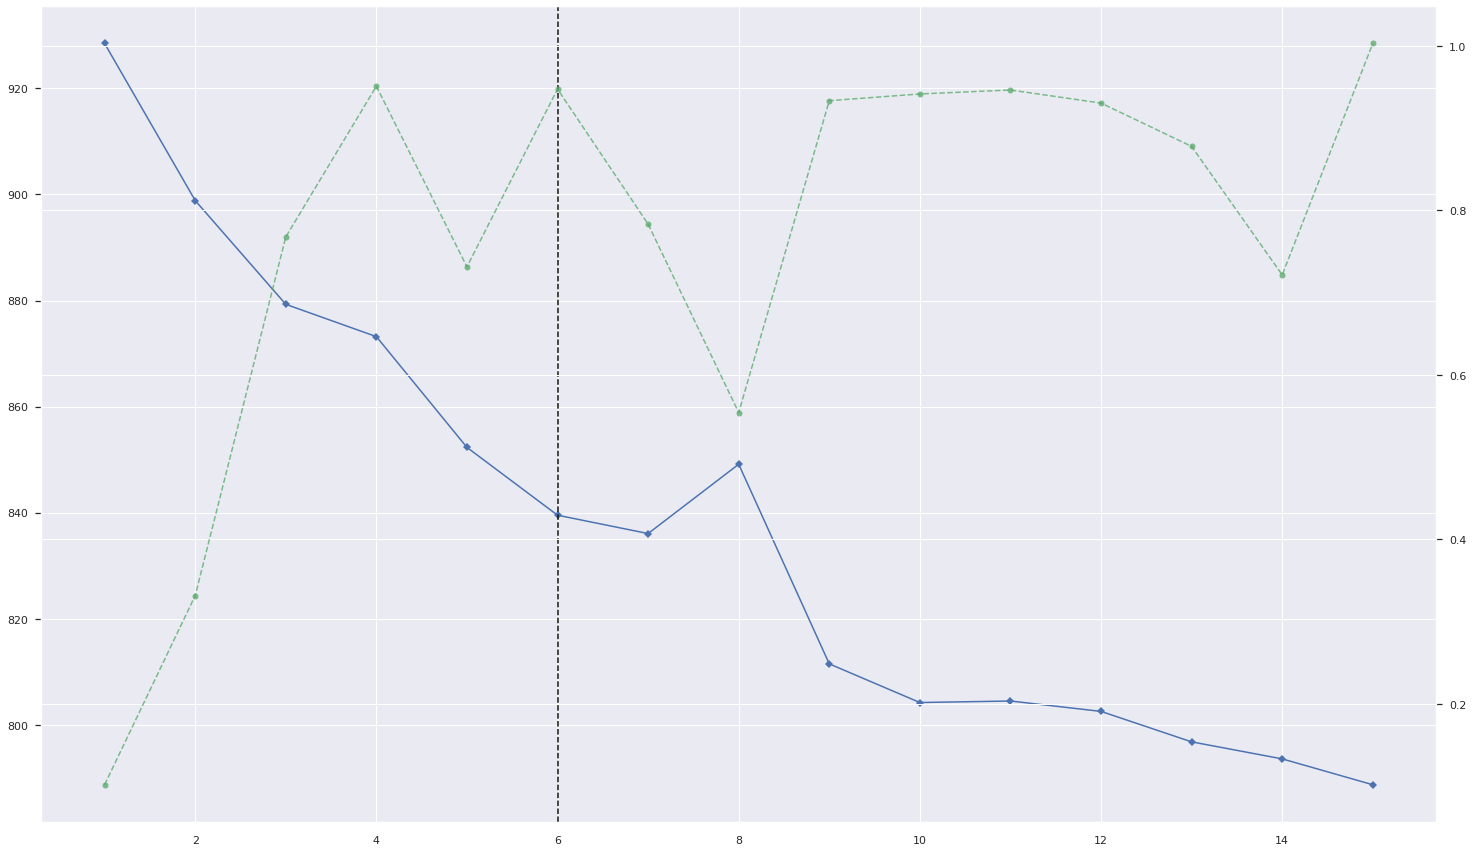

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,16)).fit(df5)

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(df5)

In [ ]:
couleurs = Palette(set(kmeans.labels_))
couleurs = [colors.to_hex((couleurs[cle])) for cle in couleurs]
lstCoul=[couleurs [lab] for lab in kmeans.labels_]

fig, ax = plt.subplots(figsize=(20, 15))
model = TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
count = 0
Y = model.fit_transform(df5)
labels = NettoieLabels(df5.index)
points = ax.scatter (Y[:, 0], Y[:, 1], c=lstCoul)
for i, labl in enumerate(labels):
  if labl in centroid.keys():  
    ax.annotate(labl, (Y[i][0], Y[i][1]))
tooltip = plugins.PointHTMLTooltip(points, labels, [couleurs [lab] for lab in kmeans.labels_],
                                   voffset=10, hoffset=10, css=css)

plugins.connect(fig, tooltip)
mpld3.plugins.connect(fig, ClickInfo(points, df5.index .to_list()))
mpld3.display()
# dans cette projection, la proximité de deux points peut-être déformée

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Faisons un zoom sur la zone confuse provoquée par des singularités

In [ ]:
Y3 = np.array(Y)

In [ ]:
Y2 = []
labels = []
catKmean = []
for ind, val in enumerate(Y3):
  x,y = val[0], val [1]
  if abs(x) < 20 and abs(y) < 20:
    Y2. append ([x,y]) 
    catKmean .append(kmeans.labels_ [ind])
    labels .append(df5 .index[ind])
Y2 = np.array(Y2)
fig,ax = plt.subplots()

lstCoul=[couleurs [lab] for lab in catKmean]

centro = kmeans.cluster_centers_
points = ax.scatter (Y2[:, 0], Y2[:, 1], c=lstCoul)
for i, col in zip(range(5), lstCoul):
    centroides = centro[i]
    ax.plot(centroides[0], centroides[1], 'o', markeredgecolor='k', markersize=5, markerfacecolor=col)
    #ax.plot(Y[labels==i, 0], X[labels==i, 1], 'wo', markerfacecolor=col, marker='.')


tooltip = plugins.PointHTMLTooltip(points, labels, [couleurs [lab] for lab in kmeans.labels_],
                                   voffset=10, hoffset=10, css=css)

plugins.connect(fig, tooltip)
mpld3.plugins.connect(fig, ClickInfo(points, df4.index .to_list()))
mpld3.display()
# dans cette projection, la proximité de deux points peut-être déformée




# Revenons au point éloigné : les locations

> bateaux, voiliers, engins à moteur : le message est "venez dans le parc c'est trop beau !"

🔔

## Tri par distance au champ lexical "locations"

> 

In [ ]:
df4 [7:8]

0         1         2        3    ...  781  782  783  784
locations  0.423292  0.230048  0.276432  0.35369  ...  0.0  0.0  0.0  0.0

[1 rows x 785 columns]

In [ ]:
dfTrie2 = df4.sort_values(by=7)

In [ ]:
tempo = df4.index # récupération des index

In [ ]:
tempo = tempo.to_list()

In [ ]:
dfTrie2.columns = list(tempo)

In [ ]:
dfTrie2['locations'] # les parcs sont proches des parcs mais les locations sont concurrentes... démarcation notable aux sites "locations"

https://culture-digitale.net/porquerolles-film-festival-programmation-fondation-carmignac-hyeres/                                                                                   0.000000
https://www.toulourenc.net/baronnies/vertical-horizon-excursions-en-haute-mer-observation-de-cetaces-en-mediterranee-excursions-a-port-cros-et-porquerolles_vertical-horizon.htm    0.000000
https://www.outdoorgo.com/portcros/                                                                                                                                                 0.000000
http://conservatoiredufreinet.org/lettres/lettredinfo0918.htm                                                                                                                       0.000000
https://arbre-a-miel.com/ref/vertical-horizon-excursions-en-haute-mer-observation-de-cetaces-en-mediterranee-excursions-a-port-cros-et-porquerolles_vertical-horizon.htm            0.000000
                                                       

In [ ]:
seuil = 0.12
Zoom2 = dfTrie2[(dfTrie2 ['locations'] < seuil) & (dfTrie2 ['locations'] > .012)]

In [ ]:
Zoom2.index

Index(['http://faune.silene.eu/index.php?cont=accueil&args=partenaires',
       'https://www.notretemps.com/loisirs/actualites-loisirs/provence-alpes-cote-dazur-port-cros-et-poquerolles,i1428',
       'https://www.mondoramas.com/actu/france-sud/terroir-varois-de-toulon-aux-iles-dhyeres.html',
       'http://orcieres.com',
       'https://www.metropoletpm.fr/tpm/article/salins-d-hyeres',
       'https://www.espace-evasion.fr/Randonnee-Midi/RATMAU/Provence-les-Iles-d-Or',
       'https://www.lisode.com/nos-clients/',
       'https://www.location-moins-cher.com/category/decouverte-de-la-france/',
       'https://www.jesuisfrancais.blog/2020/12/19/ephemeride-du-19-decembre/',
       'http://terradea.fr/actualites/decouverte/62-le-parc-national-de-port-cros?tmpl=component&print=1&layout=default',
       'http://voyages-fetiches.com/blog/ile-port-cros/',
       'http://vacanciel.com',
       'https://www.itinera-magica.com/guide-excursions-hyeres/',
       'https://www.camping-captaillat.com

In [ ]:
toutVect['parcs']

## Représentation du champ lexical

In [ ]:
aExclure = "déc"

In [ ]:
texte = []
for site in Zoom2.index:
  if site not in centroid.keys(): # que les backlinks
    texte.append([mot for mot in toutVect[site] if mot not in aExclure])

In [ ]:
palette = Palette(set(kmeans.labels_).union(set('6')))

In [ ]:
palette.keys()

In [ ]:
centroid.keys()

In [ ]:
# on affecte les mots de chaque classe à une couleur de la palette
color_to_words = dict()
color_to_words2 = dict()
for cle in set(kmeans.labels_):
  color_to_words[colors.to_hex((palette[cle]))] = []
color_to_words[colors.to_hex((palette['6']))] = []
for site in Zoom2.index: 
  if site not in centroid.keys():
    for mot in toutVect[site].split():
      if site in backlinkDiff.keys():
        tempo = list(backlinkDiff[site].values())
        tempo = [mot for liste in tempo for mot in liste if len(mot) >0]
        if mot not in tempo:
          cle = kmeans.labels_.tolist()[Zoom2.index.to_list().index(site)]
        else:
          cle = '6'
        #print(cle) # doit être la classe kmeans identifiée
        color_to_words[colors.to_hex((palette[cle]))].append(mot)
        color_to_words2[mot] = (int(palette[cle][0]*255), int(palette[cle][1]*255),int(palette[cle][2]*255))

In [ ]:
texte = ' ' .join(texte)

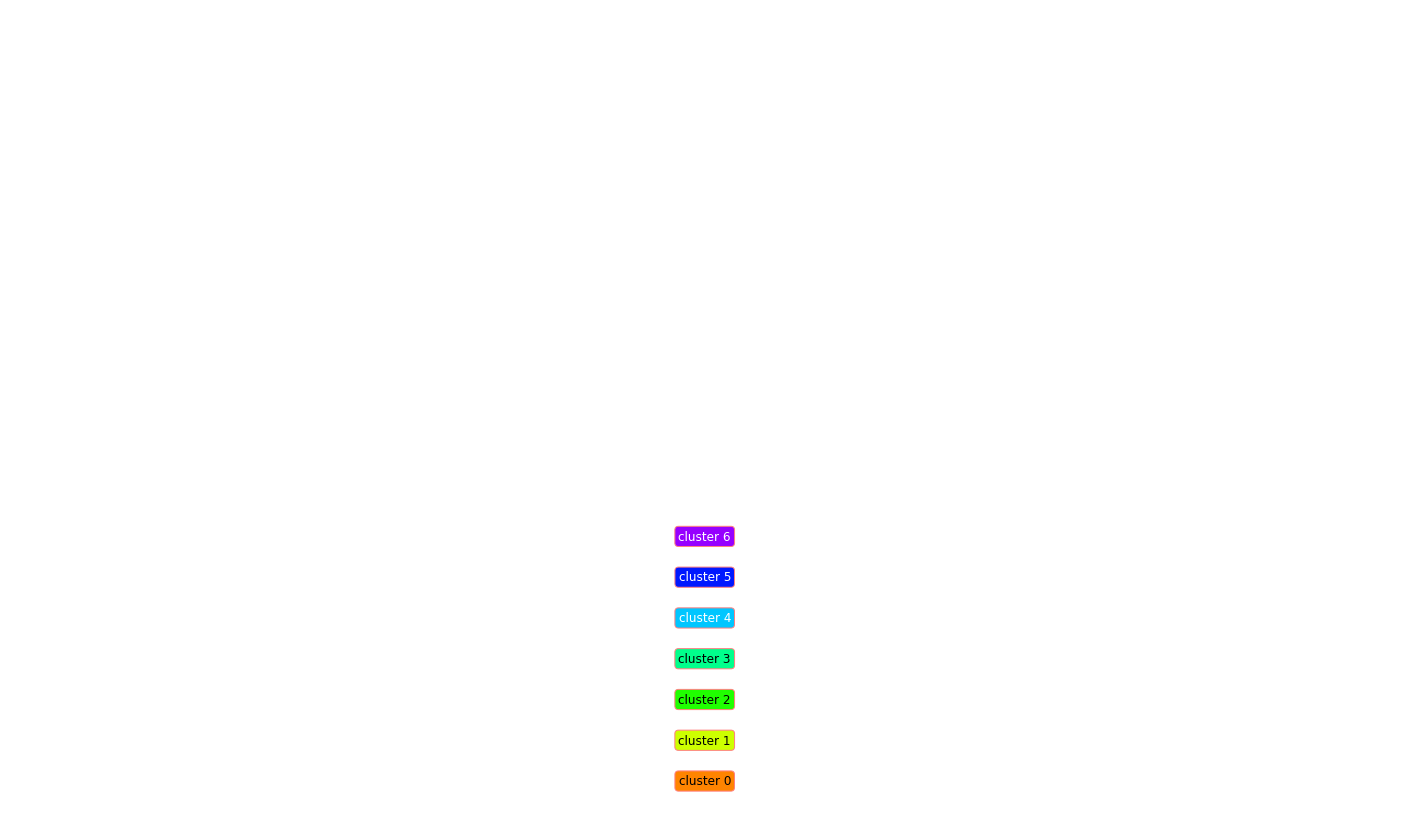

<Figure size 1800x1080 with 0 Axes>

In [ ]:
# légende à priori
y = 0

for cle in palette.keys():
  #print(cle, " ---> ", colors.to_hex(palette[cle]), int(palette[cle][2]))
  y += .05
  plt.text(0.5, y, 'cluster ' + str (cle), size=12, rotation=0,
         ha="center", va="center", color = (0+int(palette[cle][2]) , 0 +int(palette[cle][2]), 0 +int(palette[cle][2])),
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5 , 0.5 ),
                   fc=palette[cle],
                   )
         )
plt.axis("off")
plt.show()
plt.savefig(stockageSortie + "/legendeTypSites2.png")

In [ ]:
from outils import makeImage

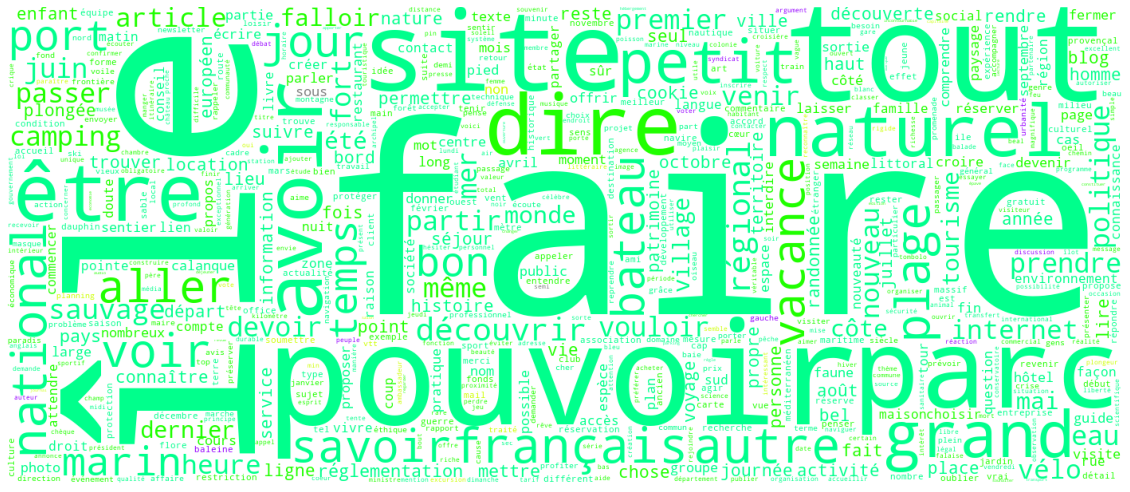

In [ ]:
makeImage (texte, palette,color_to_words ) # avec la légende ci dessus

CQFD.... 

**Tout pouvoir faire... avoir sur l'île du parc national**

Les verbes "préserver" ou "protéger" sont marginaux... alors que l'on est dans le registre lexical équivalent aux parcs, le champs lexical prédominant reste celui de la liberté d'action. Logique avec l'offre commerciale associée aux bateaux et engins à moteurs...



In [ ]:
texte5 = toutVect["locations"]

Enlevons les locations issus des sites de référence

In [ ]:
from outils import SimpleGroupedColorFunc 
def makeImage(text, palette, color_to_words, max_words=500, leg = True):
  default_color = 'grey'  # la couleur par défaut (si le mot pas présent dans
                          # le dico color_to_words)
  # Create a color function with single tone
  grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

  # Create a color function with multiple tones
  # grouped_color_func = GroupedColorFunc(color_to_words, default_color)

  wc = WordCloud(collocations=False, # vu qu'on additionne des textes...
                 background_color="white", max_words=max_words, 
                 normalize_plurals=False, # spacy l'a fait
                 width=1400, height=600).generate(text)
  plt.figure(figsize=(20, 15), facecolor=None)
  # pour avoir la légende
  if leg:
    legend = [Patch(facecolor=(colors.to_hex(palette [cle])), label=cle) for cle in palette.keys()] 
 
  wc.recolor(color_func=grouped_color_func)
  # plt.legend(handles=legend)

  plt.imshow(wc)
  # show
  #plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [ ]:
texte4 = []
for site in Zoom2.index:
  if site not in RefdicoEtiquettage.keys():
    texte4. append(toutVect[site])
texte4 = ' '.join(texte4) + toutVect["locations"]

# Conclusion : Tout pouvoir faire ou avoir sur l'île du parc national

> Le parc le sait mais voici la preuve...

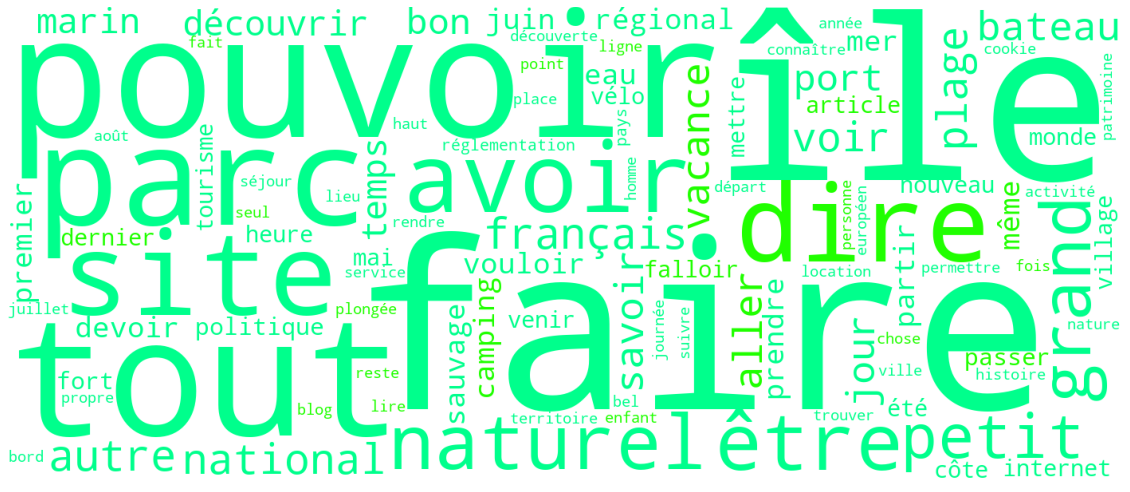

In [ ]:
makeImage(texte4, palette, color_to_words, max_words=100)

In [ ]:
plt.savefig(stockageSortie + "/locations.png")

In [ ]:

textLoc = dict()      
for cle in dicoEtiquettage.keys():
   if cle not in RefdicoEtiquettage.keys() and cle in Zoom2.index:
     textLoc [cle] = dicoEtiquettage[cle]

In [ ]:
import json
with open(stockageSortie + '/JSON/texteLocationsFiltre.json', 'w', encoding='utf-8') as f:
    json.dump(textLoc, f, ensure_ascii=False, indent=4)